In [1]:
import pickle
%load_ext autoreload
%autoreload 2

In [2]:
from analysis import *

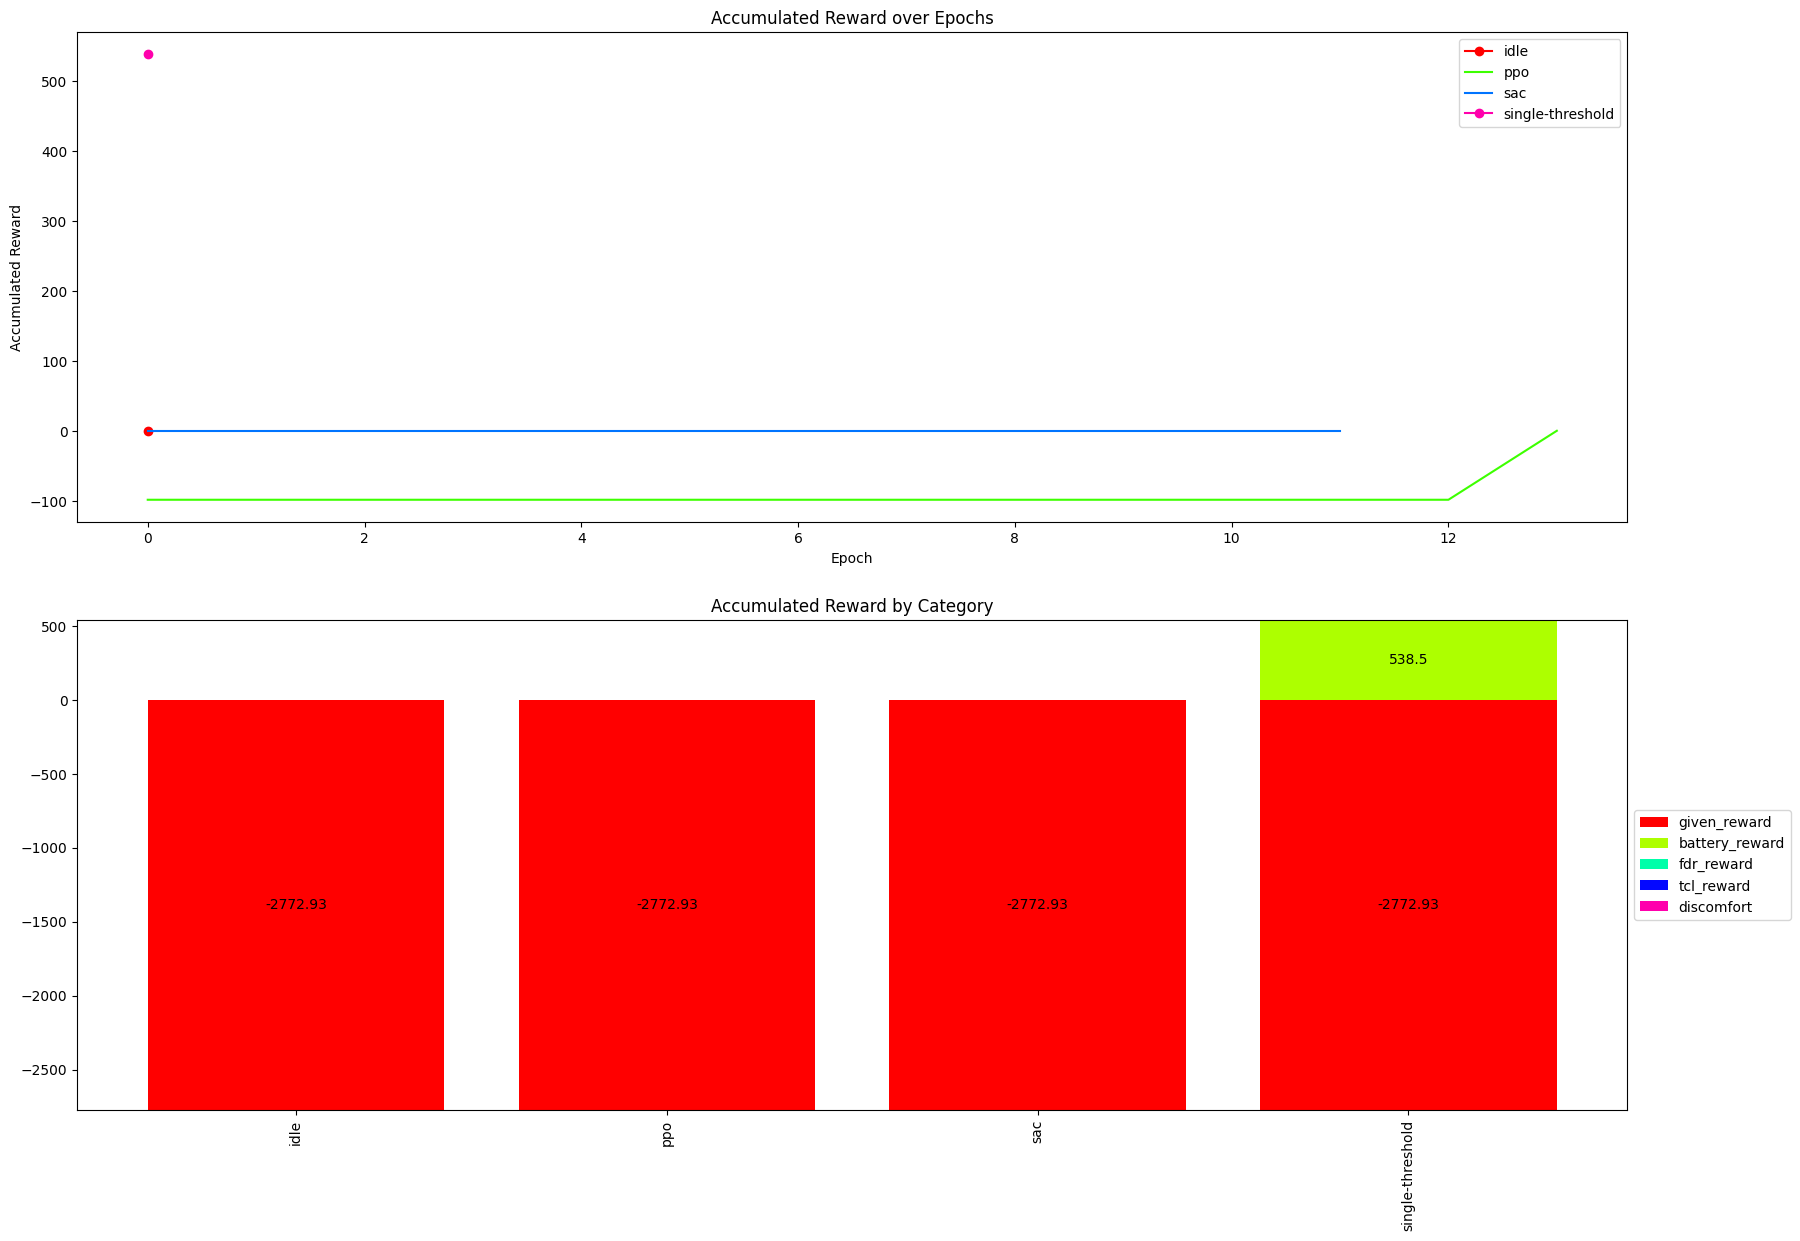

In [28]:
data_dict = overview(path="./logs/ess")

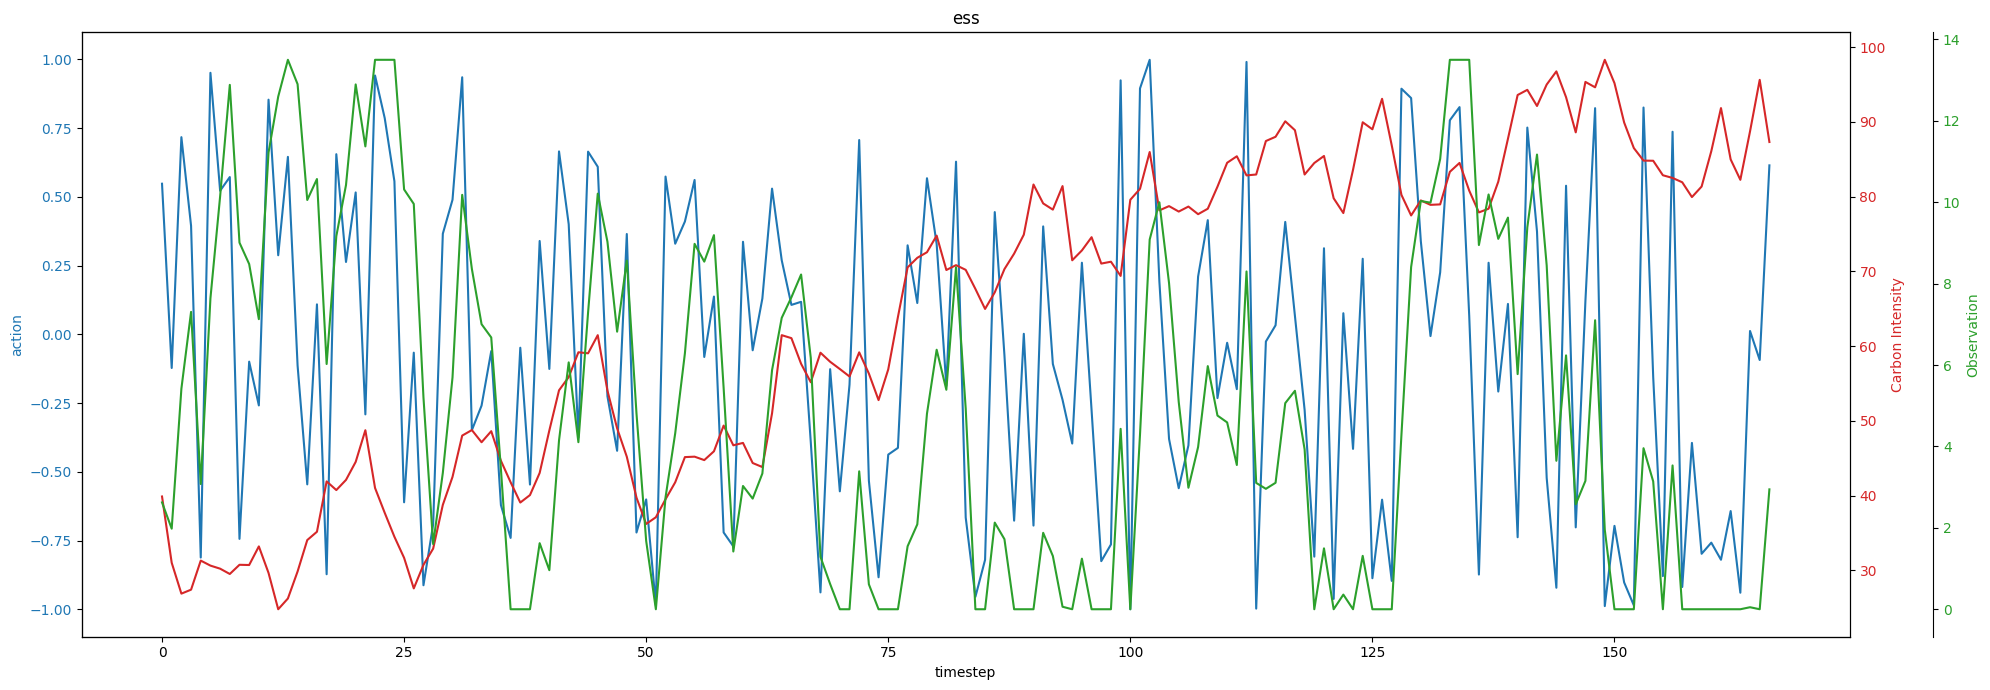

In [29]:
deep_dive(data_dict["sac"], 0)

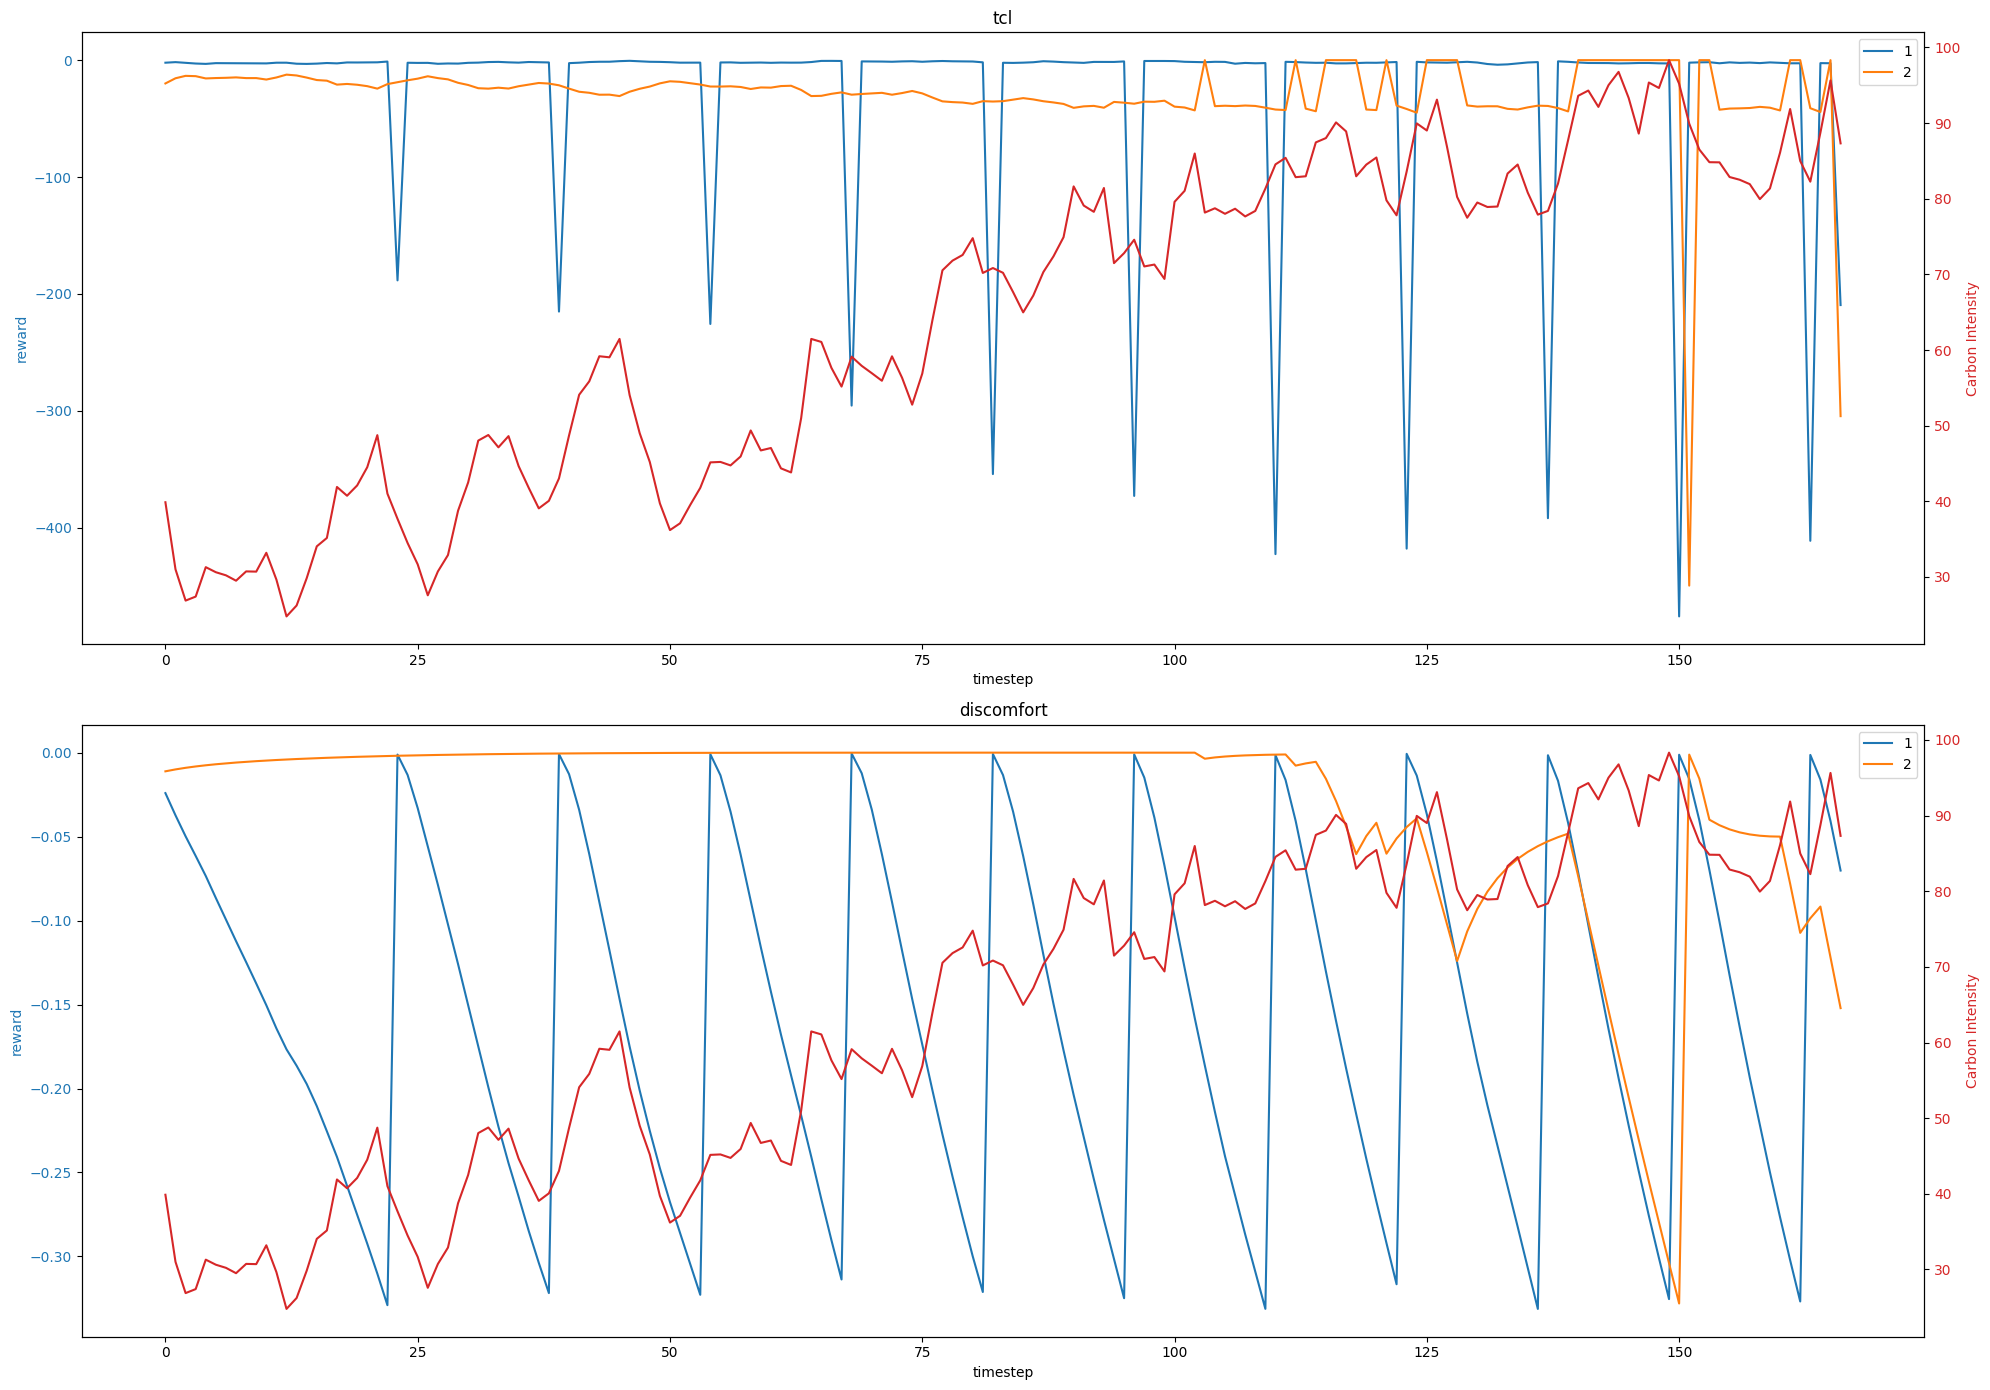

In [43]:
reward_comparison(data_dict["ppo"], data_dict["single_threshold"], [-1,0])

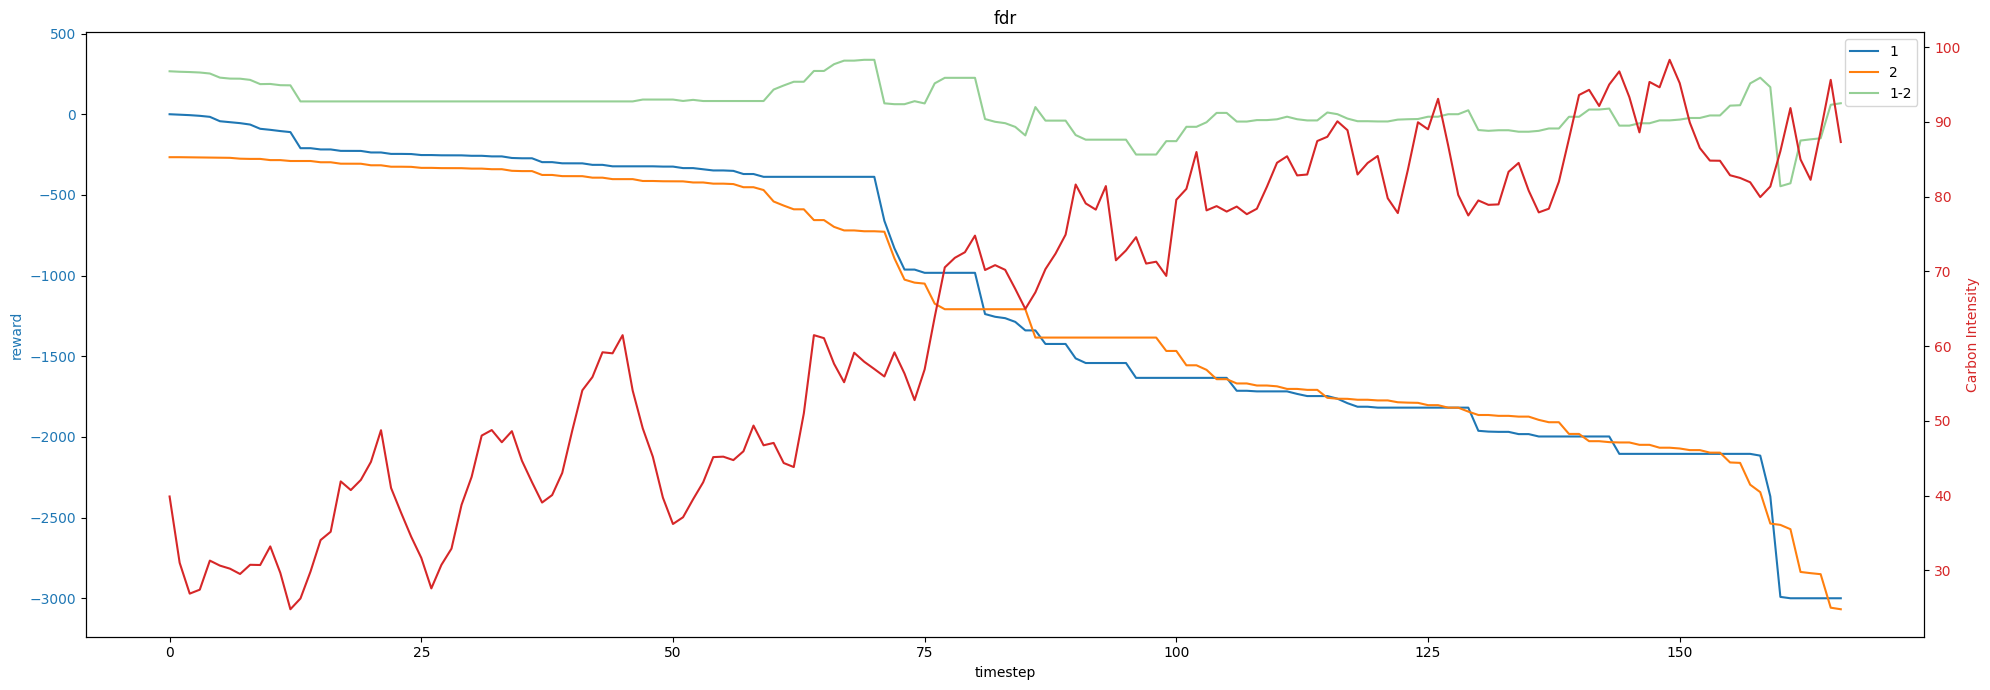

In [35]:
reward_comparison(data_dict["sac_warm"], data_dict["single_threshold"], [-1, 0], [True, True, True], True)